In [2]:
!pip install matplotlib
import numpy as np
import cv2

%matplotlib inline
from matplotlib import pyplot as plt

np.random.seed(42)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires tensorflow~=2.8.0, but you have tensorflow 2.9.0rc1 which is incompatible.


In [3]:
#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
#Take a look at the input video
from IPython.display import Video
#Video("images/overpass.mp4", embed=True)

#Replace with your own video

In [7]:
video_stream = cv2.VideoCapture(0)

# Randomly select 30 frames
frameIds = video_stream.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=30)

# Store selected frames in an array
frames = []
for fid in frameIds:
    video_stream.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = video_stream.read()
    frames.append(frame)
    
video_stream.release()

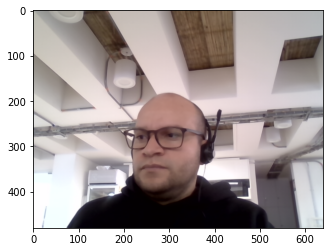

In [8]:
# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(fixColor(medianFrame))

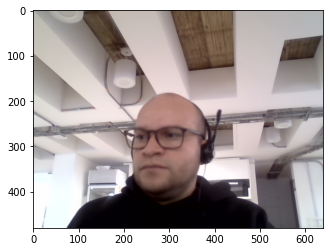

In [9]:
# Calculate the average along the time axis
avgFrame = np.average(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(fixColor(avgFrame))

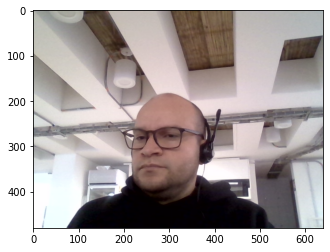

In [10]:
sample_frame=frames[0]
plt.imshow(fixColor(sample_frame))

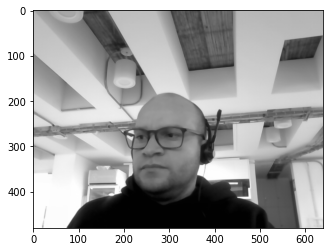

In [11]:
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(grayMedianFrame))

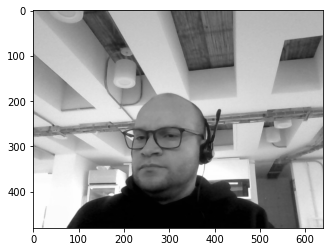

In [12]:
graySample=cv2.cvtColor(sample_frame, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(graySample))

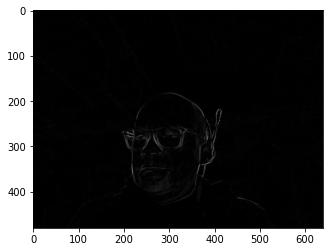

In [13]:
dframe = cv2.absdiff(graySample, grayMedianFrame)
plt.imshow(fixColor(dframe))

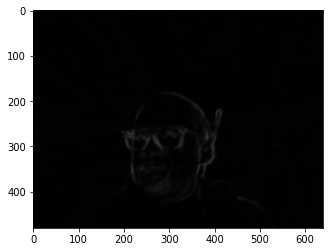

In [14]:
blurred = cv2.GaussianBlur(dframe, (11,11), 0)
plt.imshow(fixColor(blurred))

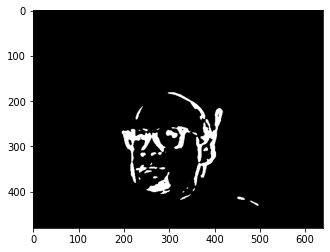

In [15]:
ret, tframe= cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(fixColor(tframe))

In [16]:
(cnts, _) = cv2.findContours(tframe.copy(), cv2.RETR_EXTERNAL, 
                             cv2 .CHAIN_APPROX_SIMPLE)

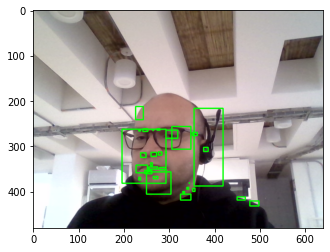

In [17]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    if y > 200:  #Disregard item that are the top of the picture
        cv2.rectangle(sample_frame,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(fixColor(sample_frame))

In [30]:
writer = cv2.VideoWriter("output.mp4", 
                         cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))

In [31]:
#Create a new video stream and get total frame count
video_stream = cv2.VideoCapture('video.mp4')
total_frames=video_stream.get(cv2.CAP_PROP_FRAME_COUNT)
total_frames

-9.223372036854776e+18

In [32]:
frameCnt=0
while(frameCnt < total_frames-1):

    frameCnt+=1
    ret, frame = video_stream.read()

    # Convert current frame to grayscale
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and
    # the median frame
    dframe = cv2.absdiff(gframe, grayMedianFrame)
    # Gaussian
    blurred = cv2.GaussianBlur(dframe, (11, 11), 0)
    #Thresholding to binarise
    ret, tframe= cv2.threshold(blurred,0,255,
                               cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #Identifying contours from the threshold
    (cnts, _) = cv2.findContours(tframe.copy(), 
                                 cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)
    #For each contour draw the bounding bos
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        if y > 200: # Disregard items in the top of the picture
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    writer.write(cv2.resize(frame, (640,480)))
 
#Release video object
video_stream.release()
writer.release()